BUSINESS PROBLEM: 

- The problem that the business deals in here is what the customers think about their hotels.
- By looking at the problem in this way, they can rectify what the customers want and what can be done to increase their reach and values.
- The hospitality business works on hearsay, most of the potential customers look at what the previous customers has to say about the place at which they stayed

VISUALISATION AS A TOOL:

- Visualisation plays a huge role in captivating an audience
- Plots tells the story that is quintessential to the business

DATA SNAPSHOT:

- The training dataset has 6100 unique users.
- The number of rows are 6287 and the columns are 6 in numbers which includes the 'Sentiment'.
- Introduced new columns of 'Year' and 'Months'.

# IMPORT REQUIRED LIBRARIES

In [1]:
import datetime
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("Train-1554810061973.csv")

# DATA EXPLORATION AND ANALYSIS

In [3]:
trainShape = train.shape
print("Rows and columns in train: ", trainShape)

Rows and columns in train:  (6287, 6)


In [4]:
train.head(3)

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007",Nice Marriot View of my king bed room,good
1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","Good hotel, charges for internet access The Ma...",good
2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007",Small but adequate rooms If you have an early ...,good


In [5]:
train.dtypes

Reviewid      object
Hotelid       object
userid        object
Date          object
reviewtext    object
Sentiment     object
dtype: object

In [6]:
#STATISTICAL SUMMARY

train.describe()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
count,6287,6287,6287,6287,6287,6287
unique,6287,100,6100,1310,6287,3
top,Review_2677,hotel_188,hotel_4370,"May 29, 2007",near the airport Standard room - doesn't merit...,good
freq,1,521,4,21,1,3213


In [7]:
uniqueUsers = train.userid.unique()
print("Unique users: ", len(uniqueUsers))

Unique users:  6100


In [8]:
from datetime import datetime
def get_year(x):
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%b %d, %Y').year
        except ValueError:
            return datetime.strptime(x, '%b %d, %Y %H:%M:%S').year
    else:
        return 2013
    pass

def get_month(x):
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%b %d, %Y').month
        except:
            return datetime.strptime(x, '%b %d, %Y %H:%M:%S').month
    else:
        return 1
    pass
    
def left_merge_dataset(left_dframe, right_dframe, merge_column):
    return pd.merge(left_dframe, right_dframe, on=merge_column, how='left')

In [9]:
#CREATING TWO COLUMNS IN TO THE TRAINING DATASET

train['Year'] = train['Date']
train['Month'] = train['Date']

In [10]:
from datetime import datetime
train.Year = train.Year.apply(lambda x: get_year(x))
train.Month = train.Month.apply(lambda x: get_month(x))


In [11]:
train.Month=train.Month.astype('object')
train.Year=train.Year.astype('object')

In [12]:
train.dtypes

Reviewid      object
Hotelid       object
userid        object
Date          object
reviewtext    object
Sentiment     object
Year          object
Month         object
dtype: object

In [13]:
#CHECKING FOR NULL VALUES

train.isna().sum()

Reviewid      0
Hotelid       0
userid        0
Date          0
reviewtext    0
Sentiment     0
Year          0
Month         0
dtype: int64

In [14]:
#CHECKING FOR DUPLICATED DATAPOINTS

train.duplicated().sum()

0

# VISUALISATIONS

<Figure size 1080x1152 with 0 Axes>

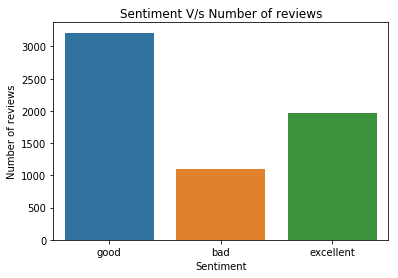

<Figure size 1080x1152 with 0 Axes>

In [15]:
sns.countplot(train.Sentiment)
plt.xlabel('Sentiment')
plt.ylabel('Number of reviews')
plt.title('Sentiment V/s Number of reviews')
plt.figure(figsize=(15,16))

<Figure size 1080x1152 with 0 Axes>

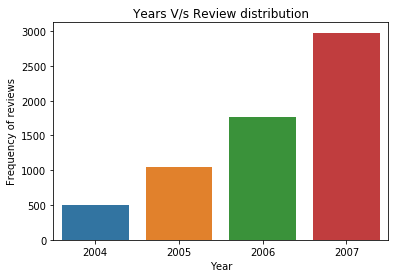

<Figure size 1080x1152 with 0 Axes>

In [16]:
sns.countplot(train.Year)
plt.xlabel("Year")
plt.ylabel("Frequency of reviews")
plt.title("Years V/s Review distribution")
plt.figure(figsize=(15,16))

Text(0.5,1,'Months V/s Review Distribution')

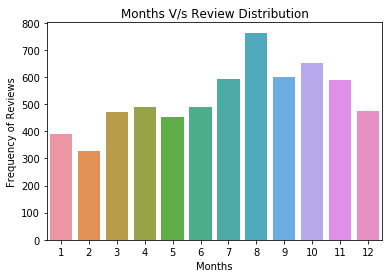

In [17]:
sns.countplot(train.Month)
plt.xlabel('Months')
plt.ylabel('Frequency of Reviews')
plt.title('Months V/s Review Distribution')

Text(0.5,0,'Hotel ID')

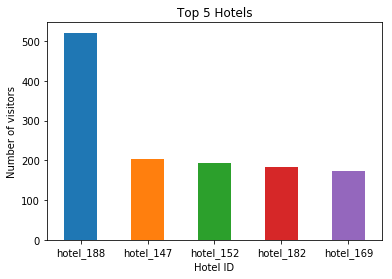

In [18]:
train.Hotelid.value_counts()[:5].plot(kind='bar')
plt.title("Top 5 Hotels")
plt.ylabel("Number of visitors")
plt.xticks(rotation=0)
plt.xlabel("Hotel ID")

CREATING A NEW DATAFRAME WITH HOTEL ID AND SENTIMENT WITH THEIR COUNTS 

In [19]:
df = train.groupby(['Hotelid','Sentiment'],as_index=False)['Hotelid'].agg(['count'])

In [20]:
df = df.reset_index()

In [21]:
df.head(4)

,Hotelid,Sentiment,count
0,hotel_101,bad,5
1,hotel_101,excellent,6
2,hotel_101,good,15
3,hotel_102,bad,6


Text(0,0.5,'Count of good reviews')

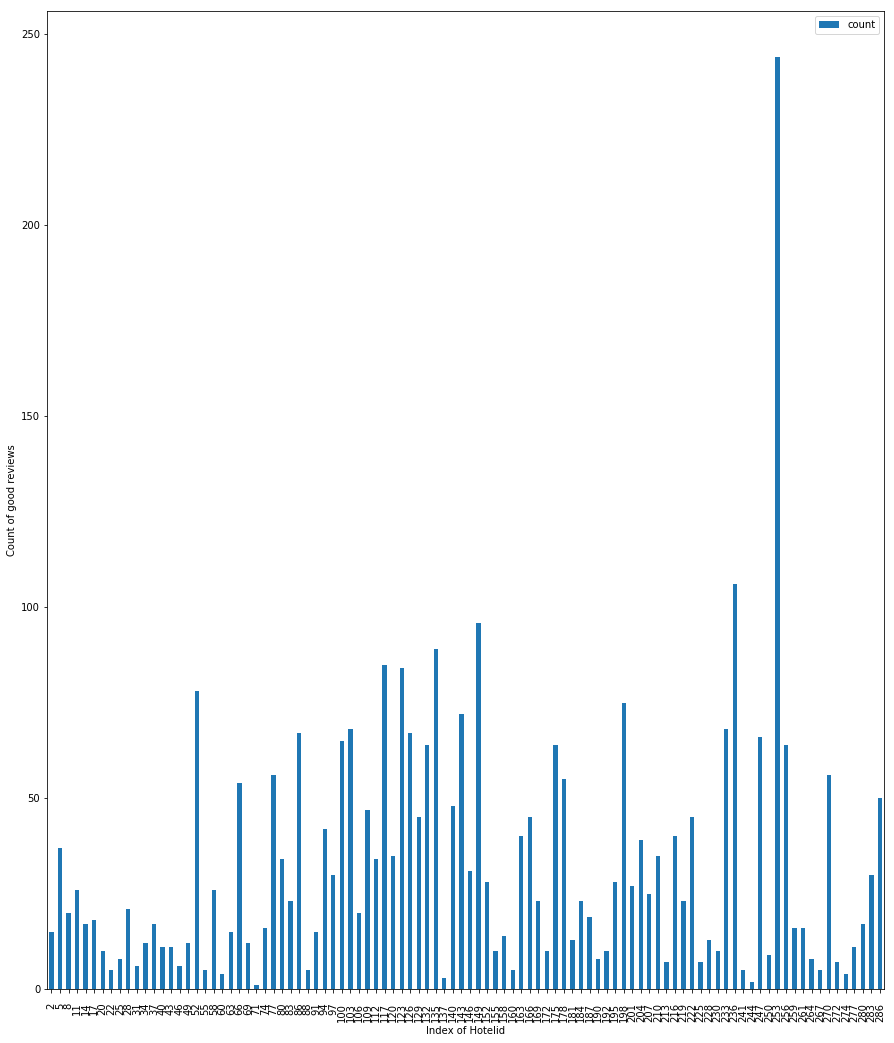

In [22]:
ax = df[df.Sentiment=='good'].plot(kind = 'bar',figsize  = (15,18))
ax.tick_params(axis='x',which = 'major',pad = 10)
plt.xticks(rotation = 90)
plt.xlabel('Index of Hotelid')
plt.ylabel('Count of good reviews')

Text(0,0.5,'Count of bad reviews')

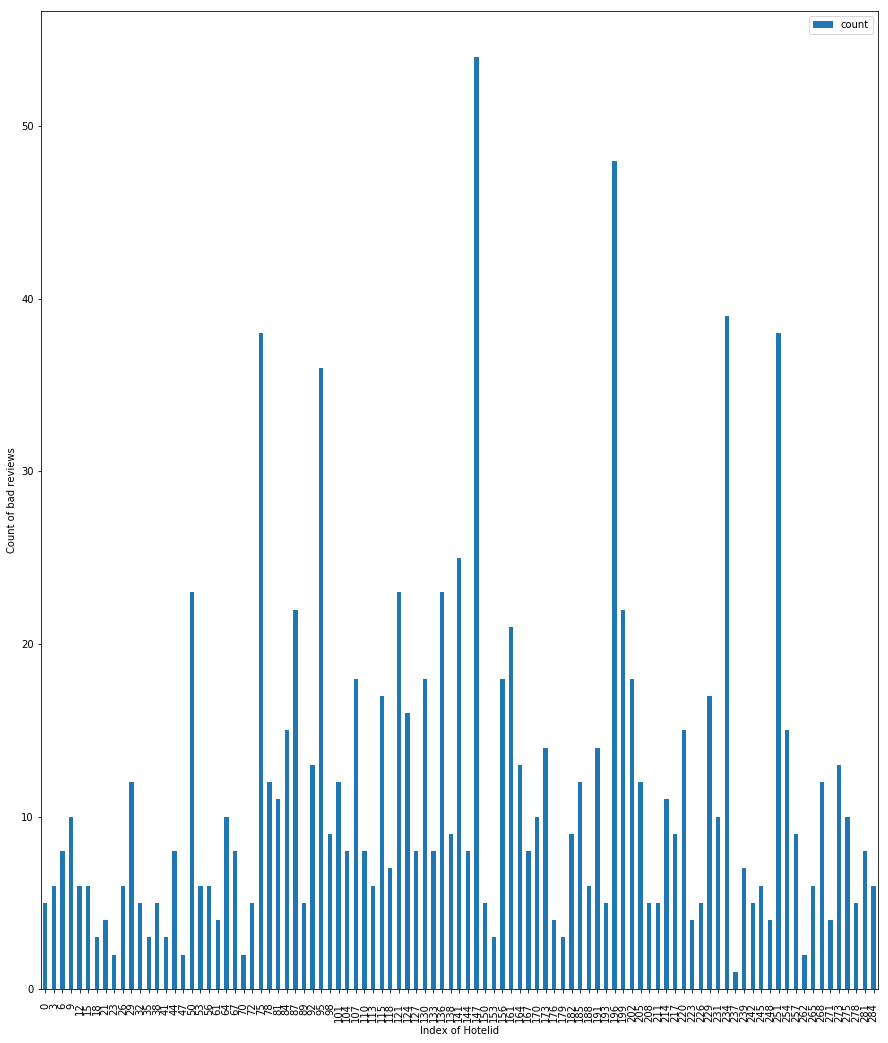

In [23]:
ax = df[df.Sentiment=='bad'].plot(kind = 'bar',figsize  = (15,18))
ax.tick_params(axis='x',which = 'major',pad = 10)
plt.xticks(rotation = 90)
plt.xlabel('Index of Hotelid')
plt.ylabel('Count of bad reviews')

Text(0,0.5,'Count of excellent reviews')

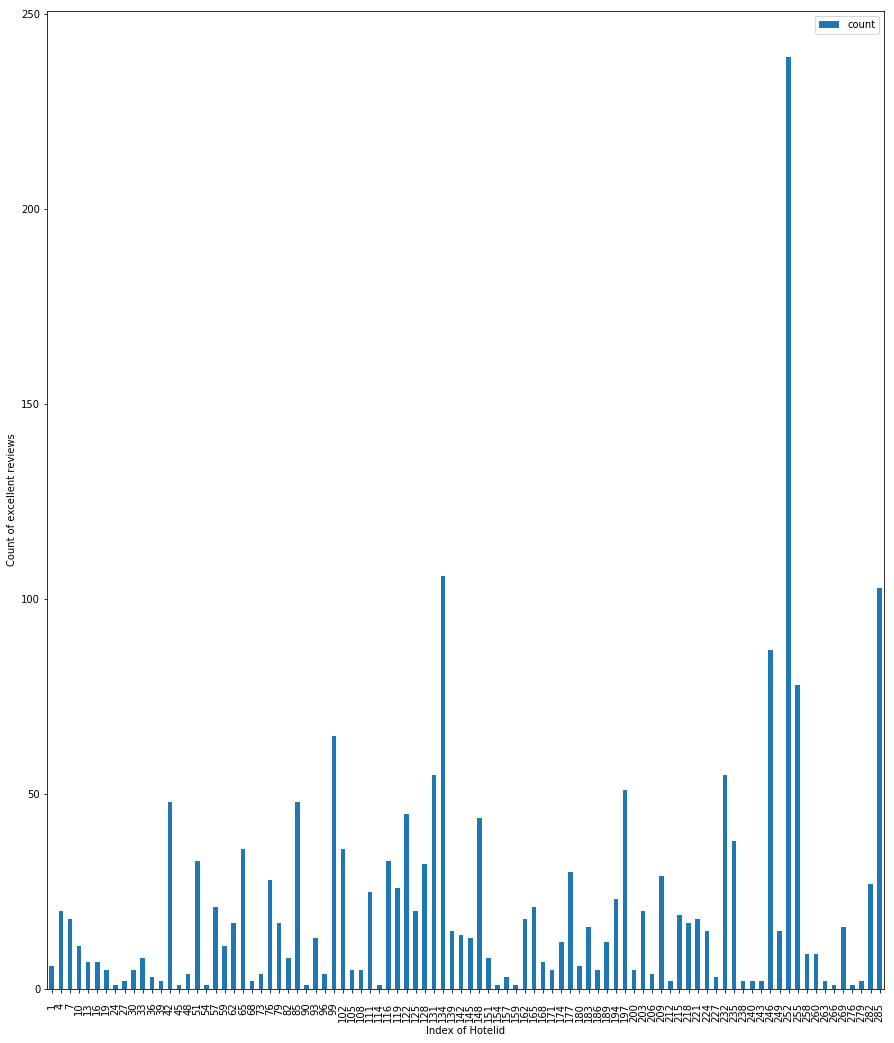

In [24]:
ax = df[df.Sentiment=='excellent'].plot(kind = 'bar',figsize  = (15,18))
ax.tick_params(axis='x',which = 'major',pad = 10)
plt.xticks(rotation = 90)
plt.xlabel('Index of Hotelid')
plt.ylabel('Count of excellent reviews')

In [25]:
import nltk
from nltk.corpus import stopwords

In [26]:
train['text_length'] = train['reviewtext'].apply(len)
train.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,Year,Month,text_length
0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007",Nice Marriot View of my king bed room,good,2007,11,43
1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","Good hotel, charges for internet access The Ma...",good,2007,10,1170
2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007",Small but adequate rooms If you have an early ...,good,2007,10,668
3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","Better than average, some noisy rooms I have s...",good,2007,8,3529
4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007",Ordinary Although it is highly rated in these ...,bad,2007,7,1143


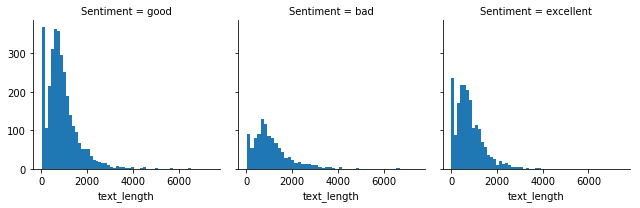

In [27]:
g = sns.FacetGrid(data=train, col='Sentiment')
g.map(plt.hist, 'text_length', bins=50)

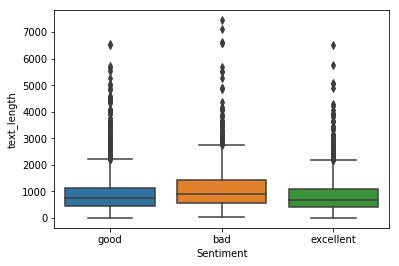

In [28]:
sns.boxplot(x='Sentiment', y='text_length', data=train)

In [29]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [30]:
review_text = train['reviewtext']

In [31]:
review_text_break = [nltk.tokenize.wordpunct_tokenize(text) for text in review_text]

In [32]:
stopwords = nltk.corpus.stopwords.words('english')

In [33]:
from itertools import groupby

def clear_multiple_char(comment):        
    ti = []
    for words in comment:
        t = [''.join(["".join(i) for i, _ in groupby(word)]) if len(word)>10 else word for word in words]
        ti.append(t)
    return ti

In [34]:
review_text_clear = clear_multiple_char(review_text_break)

In [35]:
from collections import Counter

def counter(comment_clear):
    cnt = Counter()
    for words in comment_clear:
        for word in words:
            cnt[word] += 1
    return cnt

In [36]:
from nltk.tokenize import RegexpTokenizer
import string

In [37]:
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
punctuation = string.punctuation
punctuation += '0123456789'

def comment_raiz(comment):
    text = []
    for lista in comment:
        valids = [stemmer.stem(word) for word in lista if word not in stopwords and word not in punctuation 
                  and len(word)>2]
        valids_true = [''.join([char for char in word if char not in punctuation]) for word in valids if 
                       len(''.join([char for char in word if char not in punctuation]))>0]
        text.append(valids_true)
    return text

In [38]:
review_text_clear = comment_raiz(review_text_clear)

In [39]:
review_text_clear_counter = counter(review_text_clear)

In [40]:
review_text_clear_counter.most_common(5)

[('hotel', 14554),
 ('the', 14289),
 ('room', 14193),
 ('stay', 8706),
 ('gre', 6100)]

# SOME MORE VISUALISATION 

In [41]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import random

In [42]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


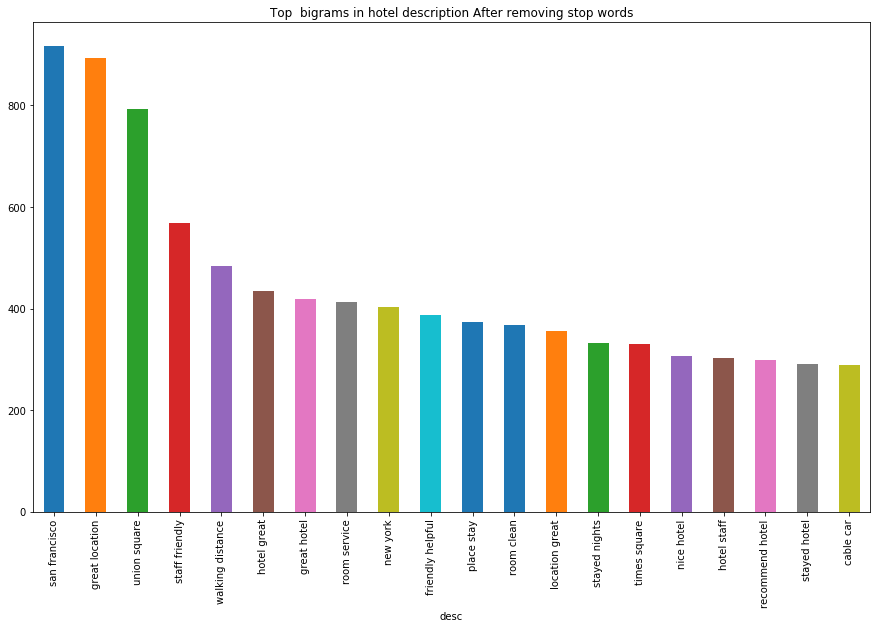

In [43]:
common_words = get_top_n_bigram(train['reviewtext'], 20)
df = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df.groupby('desc').sum()['count'].sort_values(ascending=False).plot(kind='bar', figsize=(15,9),title='Top  bigrams in hotel description After removing stop words')